In [22]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
os.makedirs("../docs", exist_ok=True)

In [ ]:
df = pd.read_csv("../files/input/shipping-data.csv")
df.head()

In [33]:
def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()

    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel = "Warehouse block",
        ylabel = "Record Count",
        color= "tab:blue",
        fontsize=8,
    )

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks(rotation=0)

    plt.savefig("../docs/shipping_per_warehouse.png")

In [37]:
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    
    counts.plot.pie(
        title= "Mode of shipment",
        wedgeprops= dict(width=0.35),
        ylabel="",
        colors=["tab:blue", "tab:orange", "tab:green"]
    )

    plt.savefig("../docs/mode_of_shipment.png")

In [39]:
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()

    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )

    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]

    plt.barh(
        y=df.index.values,
        width=df["max"].values - 1,
        left=df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8
    )

    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]

    plt.barh(
        y = df.index.values,
        width=df["mean"].values - 1,
        left= df["min"].values,
        color = colors,
        height= 0.5,
        alpha = 1.0
    )

    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.savefig("../docs/average_customer_rating.png")

In [40]:
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()

    df.Weight_in_gms.plot.hist(
        title= "Shipped Weight Distribution",
        color= "tab:orange",
        edgecolor= "white"
    )

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


    plt.savefig("../docs/weight_distribution.png")

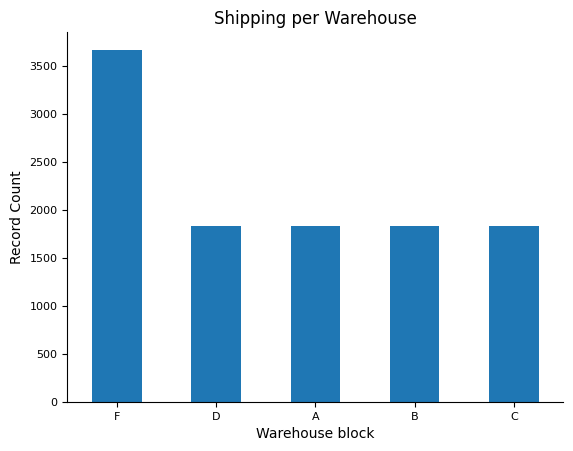

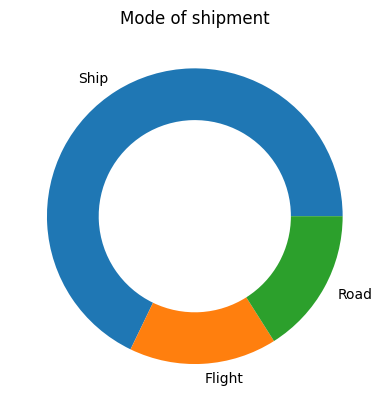

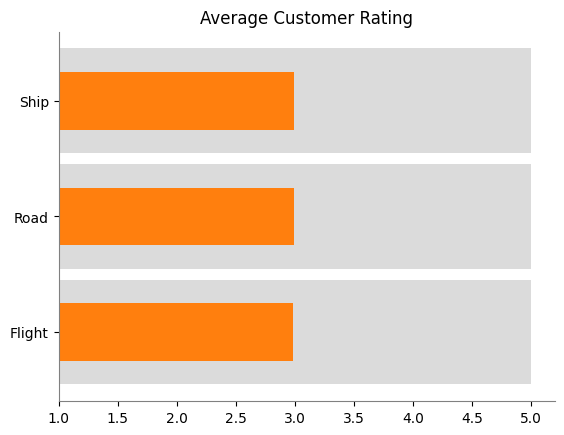

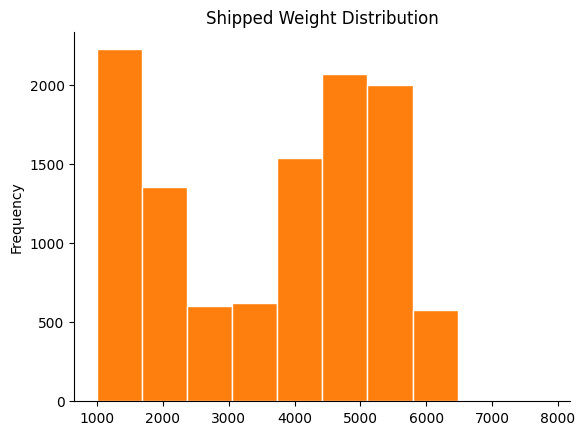

In [41]:
create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)